<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общий-обзор-датасета" data-toc-modified-id="Общий-обзор-датасета-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общий обзор датасета</a></span></li><li><span><a href="#Разделим-данные-на-обучающую,-валидационную-и-тестовую-выборки." data-toc-modified-id="Разделим-данные-на-обучающую,-валидационную-и-тестовую-выборки.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделим данные на обучающую, валидационную и тестовую выборки.</a></span></li><li><span><a href="#Исследуем-качество-моделей." data-toc-modified-id="Исследуем-качество-моделей.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуем качество моделей.</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Выбор-наилучшей-модели-и-ее-тестирование" data-toc-modified-id="Выбор-наилучшей-модели-и-ее-тестирование-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор наилучшей модели и ее тестирование</a></span></li><li><span><a href="#Улучшение-модели-и-проверка-на-адекватность" data-toc-modified-id="Улучшение-модели-и-проверка-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Улучшение модели и проверка на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Рекомендация тарифов

Необходимо построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».\
**Цель:** построить модель для задачи классификации, которая выберет подходящий тариф.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
-  **сalls** — количество звонков,
-  **minutes** — суммарная длительность звонков в минутах,
-  **messages** — количество sms-сообщений,
-  **mb_used** — израсходованный интернет-трафик в Мб,
-  **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.dummy import DummyClassifier


In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

## Общий обзор датасета

In [3]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.duplicated().sum()

0

Пропусков и дубликатов нет, название столбцов правильное, типы данных соответствуют содержанию.

##  Разделим данные на обучающую, валидационную и тестовую выборки.

Поскольку тестовую выборку необходимо создать из имеющихся данных, то делим датасет следующим образом:\
60% - обучающая выборка data_train;\
20% - тестовая выборка data_test;\
20% - валидационная выборка data_valid.

In [6]:
data.query('is_ultra == 1').count()

calls       985
minutes     985
messages    985
mb_used     985
is_ultra    985
dtype: int64

In [7]:
data.query('is_ultra == 0').count()

calls       2229
minutes     2229
messages    2229
mb_used     2229
is_ultra    2229
dtype: int64

Указываем параметр **stratify** ,чтобы в выборках в целевом признаке сохранилась пропорция между классами, такая же как и в исходных данных.

In [8]:
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

In [9]:
features_train, features_temp, target_train, target_temp = train_test_split(features, target, 
                                                    test_size=0.4, 
                                                    random_state=12345,
                                                    stratify=target)
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_temp по классам: {np.bincount(target_temp)}")

Количество строк в target_train по классам: [1337  591]
Количество строк в target_temp по классам: [892 394]


In [10]:
features_valid, features_test, target_valid, target_test =  train_test_split(features_temp, target_temp, 
                                                    test_size=0.5, 
                                                    random_state=12345,
                                                    stratify=target_temp)
print(f"Количество строк в target_valid по классам: {np.bincount(target_valid)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_valid по классам: [446 197]
Количество строк в target_test по классам: [446 197]


In [11]:
print('Доля обучающей выборки от общих данных', np.round((features_train.shape[0] / data.shape[0]),decimals = 2))
print('Доля тестовой выборки от общих данных', np.round((features_test.shape[0] / data.shape[0]),decimals = 2))
print('Доля валидационной выборки от общих данных',np.round((features_valid.shape[0] / data.shape[0]),decimals = 2))

Доля обучающей выборки от общих данных 0.6
Доля тестовой выборки от общих данных 0.2
Доля валидационной выборки от общих данных 0.2


##  Исследуем качество моделей.

Данная задача относится к классификации, поэтому будем рассматривать следующие алгоритмы классификации:
-  Дерево решений
-  Случайный лес
-  Логистическая регрессия

### Дерево решений

Подберем гиперпараметр max_depth при котором модель, обученная на алгоритме дерева решений, будет показывать наилучший результат.

In [12]:
val_scores = []
train_scores = []

best_max_depth = 1
best_score_tree = 0
best_model_tree = None

for n in range(1, 20):
    model = DecisionTreeClassifier(max_depth=n, random_state=12345)
    model.fit(features_train,target_train) #Обучаем на тренировочной выборке
    val_preds = model.predict(features_valid)#предсказания на валидационной
    train_preds = model.predict(features_train) #предсказания на тренировочной

    train_scores.append(accuracy_score(target_train, train_preds))# считаем качество модели на тренировочной выборке
    val_scores.append(accuracy_score(target_valid, val_preds))# считаем качество модели на валидационной выборке
    
    if accuracy_score(target_valid, val_preds) > best_score_tree:
        best_score_tree = accuracy_score(target_valid, val_preds)
        best_max_depth = n
        best_model_tree = model
        
print(f'Лучшая глубина дерева: {best_max_depth}')
print(f'Лучшая метрика: {best_score_tree}')
print(f'Лучшая модель: {best_model_tree}')

Лучшая глубина дерева: 8
Лучшая метрика: 0.80248833592535
Лучшая модель: DecisionTreeClassifier(max_depth=8, random_state=12345)


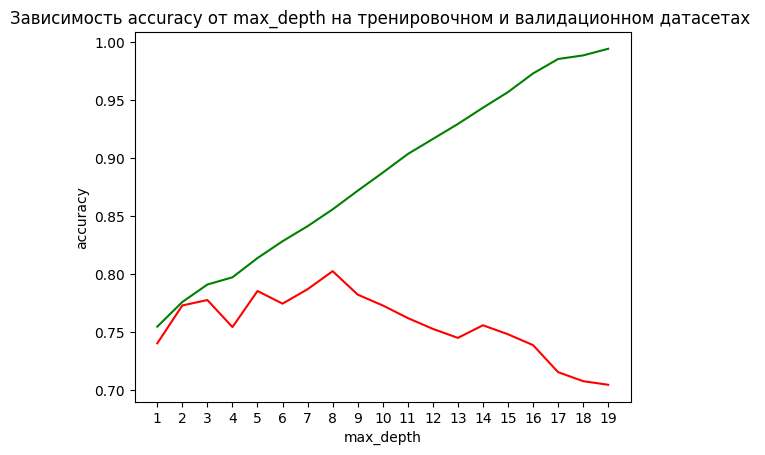

In [13]:
sns.lineplot(x=list(range(1, 20)), y=train_scores, color='g')
sns.lineplot(x=list(range(1, 20)), y=val_scores, color='r')
plt.xticks(list(range(1, 20)))
plt.title('Зависимость accuracy от max_depth на тренировочном и валидационном датасетах ')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()

На графике видно, что при глубине дерева больше 8 на валидационной выборке, accuracy начинает снижаться.

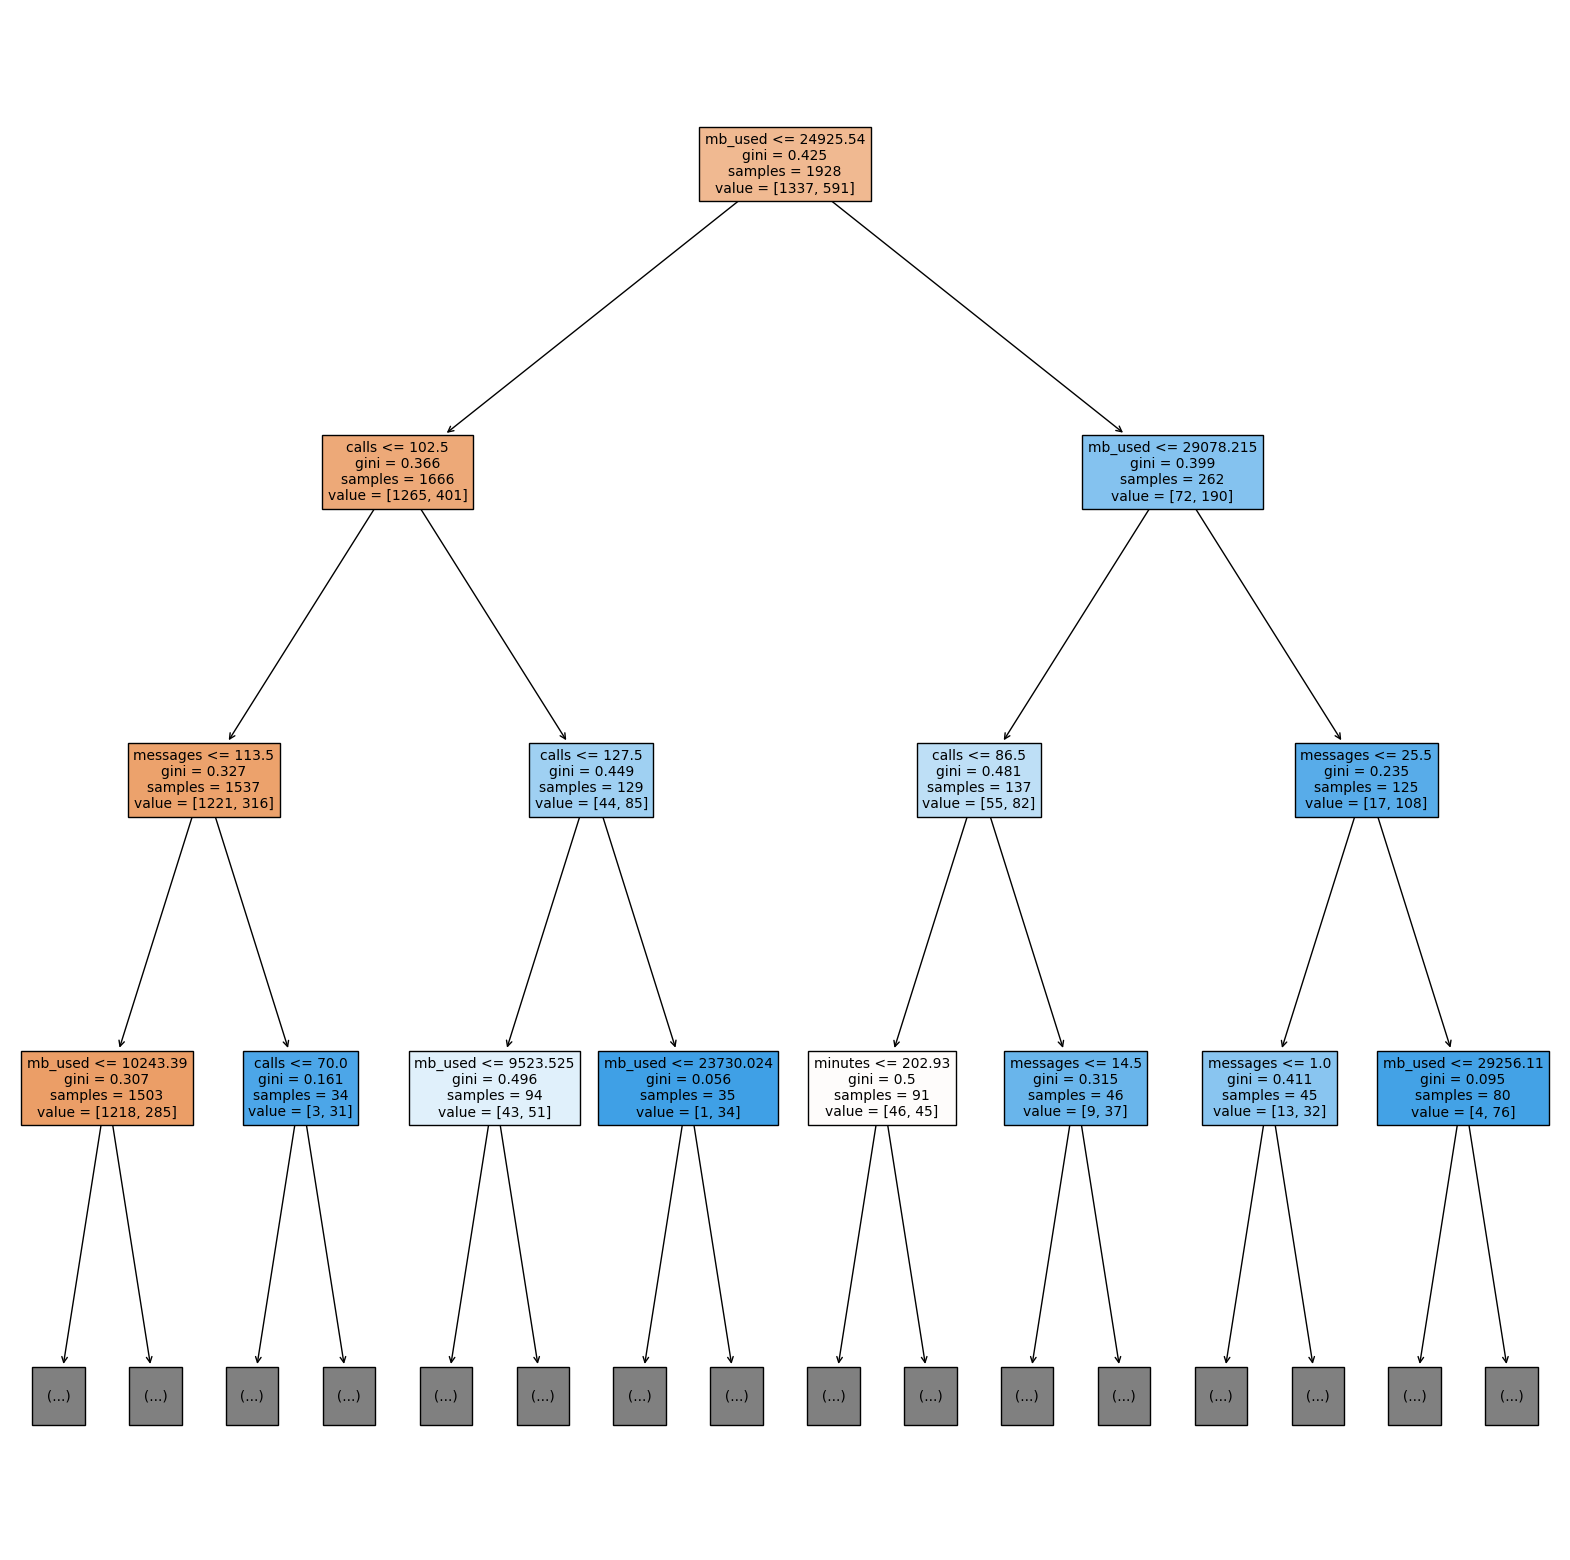

In [14]:
fn = ['calls','minutes','messages','mb_used']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
plot_tree(best_model_tree,max_depth = 3, feature_names=fn, filled=True,fontsize=10)
plt.show()

Видно,что самым весомым принаком модель посчитала mb_used <= 24925.54, далее снижала критерий gini по признакам calls<= 102.5 и снова по mb_used<=29078.215.

Посмотрим на матрицу ошибок.

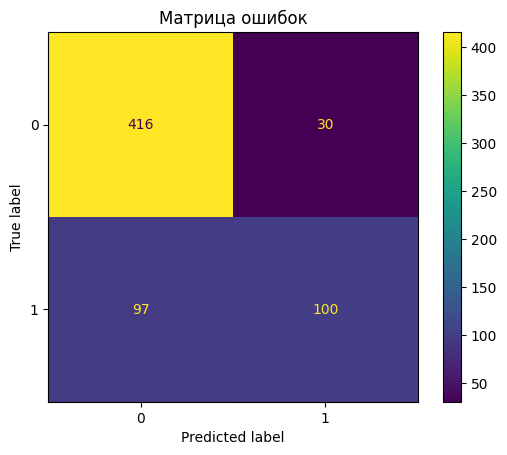

In [15]:
predictions_tree = best_model_tree.predict(features_valid)
matrix = confusion_matrix(target_valid,predictions_tree,labels=best_model_tree.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=best_model_tree.classes_)
disp.plot()
plt.title('Матрица ошибок')
plt.show()



516 раз модель предсказала правильно, из них 100 раз предсказала 1 ,когда она действительно 1, и 416 раз 0,когда в реальности он 0.

### Случайный лес

В алгоритме случайного леса, так же важным гиперпараметром является n_estimators, количество деревьев.\
Подберем глубину деревьев и их количество, чтобы качество предсказаний было наилучшим.

In [16]:
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0
for est in range(10,50,10):
    for depth in range (1, 10):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # обучаем модель с заданным количеством и глубиной деревьев
        model_forest.fit(features_train, target_train) 
        result = model_forest.score(features_valid,target_valid ) 
        if result > best_result_forest:
            best_model_forest = model_forest
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_forest,"Количество деревьев:", best_est_forest, "Максимальная глубина:", best_depth_forest)
print(f'Лучшая модель: {best_model_forest}')

Accuracy наилучшей модели на валидационной выборке: 0.8211508553654744 Количество деревьев: 40 Максимальная глубина: 9
Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345)


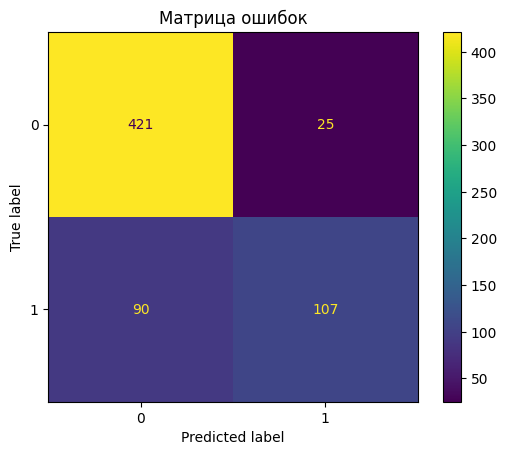

In [17]:
predictions_forest = model_forest.predict(features_valid)
matrix = confusion_matrix(target_valid,predictions_forest,labels=model_forest.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=model_forest.classes_)
disp.plot()
plt.title('Матрица ошибок')
plt.show()


Здесь видим, что модель предстказала правильно 528 раз на валидационной выборке, что уже лучше, чем в алгоритме дерева решений.

### Логистическая регрессия

In [18]:
model_logistic = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_logistic.fit(features_train, target_train) 
best_result_logistic = model_logistic.score(features_valid,target_valid) 
print("Accuracy наилучшей модели на валидационной выборке:", best_result_logistic)

Accuracy наилучшей модели на валидационной выборке: 0.7387247278382582


### Выбор наилучшей модели и ее тестирование

Сведем полученные результаты на валидационной выборке разных алгоритмов, для определения наилучшего.

In [19]:
result = pd.DataFrame()
result['model'] = ['DecisionTree','RandomForest','LogisticRegression']
result['accuracy'] =[best_score_tree,best_result_forest,best_result_logistic]
result

,model,accuracy
0,DecisionTree,0.802488
1,RandomForest,0.821151
2,LogisticRegression,0.738725


Как видим на валидационной выборке лучше всего себя показала модель случайного леса с количеством деревьев 40 и максимальной глубиной деревьев 9. Проверим эту модель на тестовой выборке.

In [20]:
best_model_forest.score(features_test,target_test)

0.8087091757387247

### Улучшение модели и проверка на адекватность

Попробуем улучшить модель, обучив ее на большем количестве данных, для этого объеденим тренировочную и валидационную выборки.По скольку валидационная больше ненужна, выбор наилучшей модели выполнен.

In [21]:
frames_features = [features_valid, features_train]
frames_target = [target_valid, target_train]
features_val_train = pd.concat(frames_features)
target_val_train = pd.concat(frames_target)

model_val_train = RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345,class_weight='balanced')
model_val_train.fit(features_val_train,target_val_train)

print('Accuracy на объединенных выборках составляет:', model_val_train.score(features_test,target_test))

Accuracy на объединенных выборках составляет: 0.8304821150855366


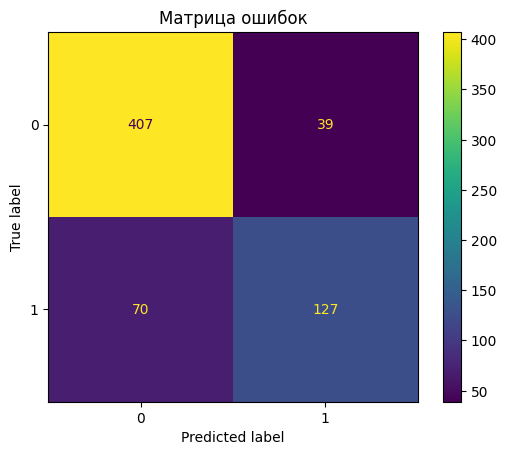

In [22]:
predictions_val_train = model_val_train.predict(features_test)
matrix = confusion_matrix(target_test,predictions_val_train,labels=model_val_train.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=model_val_train.classes_)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

Результат улучшился.При обучении только на тренировочной выборке accuracy был 0.8087091757387247, а на объединенной с валидационной стал 0.8242612752721618. Итого 530 правильных предсказаний из 643 возможных.

В данных наблюдается дисбаланс классов,сравним показатель нашей наилучшей модели с показателем модели,которая предсказывает самый часто встречающийся класс, в нашем случае - ноль.

In [23]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_val_train,target_val_train)
dummy_clf.score(features_test,target_test)

0.6936236391912908

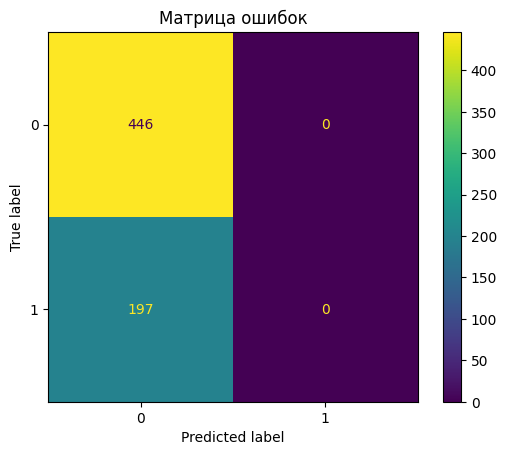

In [24]:
predictions_dummy_clf = dummy_clf.predict(features_test)
matrix = confusion_matrix(target_test,predictions_dummy_clf,labels=dummy_clf.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=dummy_clf.classes_)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

Как видим на выбранной лучшей модели результат лучше,0.824 в сравнении с 0.694. Так же добавила в расчет наилучшей модели гиперпараметр class_weight='balanced', который позволяет минимизировать влияние дисбаланса(без него score был 0.83, с ней стал 0.82).\
В деревьях решений (и их обобщениях – случайном лесе и градиентном бустинге), дисбаланс классов влияет на меры неоднородности (impurity) листьев, но это влияние примерно пропорционально для всех кандидатов в очередную разбивку (split), и потому обычно не особо влияет на выбор разбивок.

### Вывод

Имея данные о :
-  сalls — количество звонков,
-  minutes — суммарная длительность звонков в минутах,
-  messages — количество sms-сообщений,
-  mb_used — израсходованный интернет-трафик в Мб,
-  is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

Необходимо было проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».\
Для этого разбили данные на три выборки(тренировочну, валидационную и тестовую).\
Поскольку перед нами стояла задача классификации проверяли три модели : дерево решений, случайный лес и логистическая регрессия.\
Обучив каждую из них на треноровочном наборе и  сравнив результаты на валидационной выборке определили наилучшую модель: **RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345,class_weight='balanced')**.\
Протестировав на тестовой, получили приемлемый результат: 0.8087091757387247.\
Далее обучили выбранную модель на объединенных тренировочном и валидационном наборах, улучшили результат до **0.8242612752721618.**\
Так же модель прошла проверку на адекватность, при сравнении с моделью, предсказывающей самый популярный класс, с score = 0.6936236391912908 